In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../code")
import model
import parametros


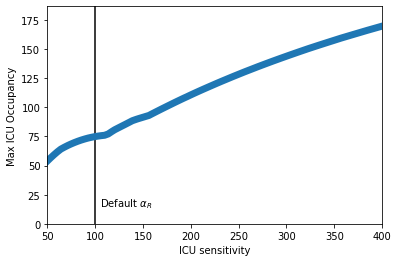

In [3]:
ICU = np.linspace(50, 400, 100)
alphas = parametros.alpharange

alpha_array=[]
maxicu = []
for alph in alphas:
    with open(f"../datamodelruns/alpha_r/sweep/alphaR={alph}.pickle", "rb") as f:
        m=pickle.load(f)
        alpha_array.append(alph)
        maxicu.append(np.max(m.chopped_data()[:,7]))
 
alphar_default = parametros.params['alpha_R']
plt.vlines(1/alphar_default, 0, np.max(maxicu)*1.1)
plt.text(1/alphar_default+5, 15, 'Default $α_R$')

plt.plot(1/np.array(alpha_array),maxicu, linewidth=7)
plt.ylabel('Max ICU Occupancy')
plt.xlabel('ICU sensitivity')
plt.ylim(0,np.max(maxicu)*1.1)
plt.xlim(1/alphas[0], 1/alphas[-1])
plt.show()